# Tugas Klastering Lokasi Gerai Kopi dan Zona Sepi
**Metode: KMeans, Hierarchical Clustering, dan DBSCAN**

## Pendahuluan
Tujuan dari analisis ini adalah untuk mengelompokkan lokasi gerai kopi dan zona sepi menggunakan metode klastering: KMeans, Hierarchical Clustering, dan DBSCAN.


In [1]:
import pandas as pd
df = pd.read_csv("lokasi_gerai_kopi_clean.csv")
df.head()


,x,y,population_density,traffic_flow,competitor_count,is_commercial
0,37.454012,39.363552,6684.383436,1117.611140,1,1
1,95.071431,47.343566,444.735522,490.055410,0,0
2,73.199394,85.454739,1176.914042,749.731899,0,0
3,59.865848,34.000439,6077.576901,1472.876645,7,1
4,15.601864,86.964968,746.725028,341.217897,2,0


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['x', 'y', 'population_density', 'traffic_flow', 'competitor_count', 'is_commercial']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## KMeans Clustering

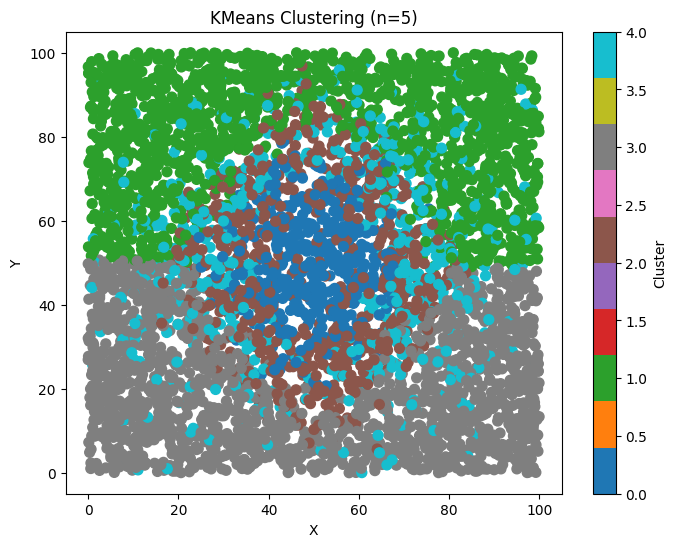

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df['x'], df['y'], c=kmeans_labels, cmap='tab10', s=50)
plt.title('KMeans Clustering (n=5)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()


## Hierarchical Clustering (Agglomerative)

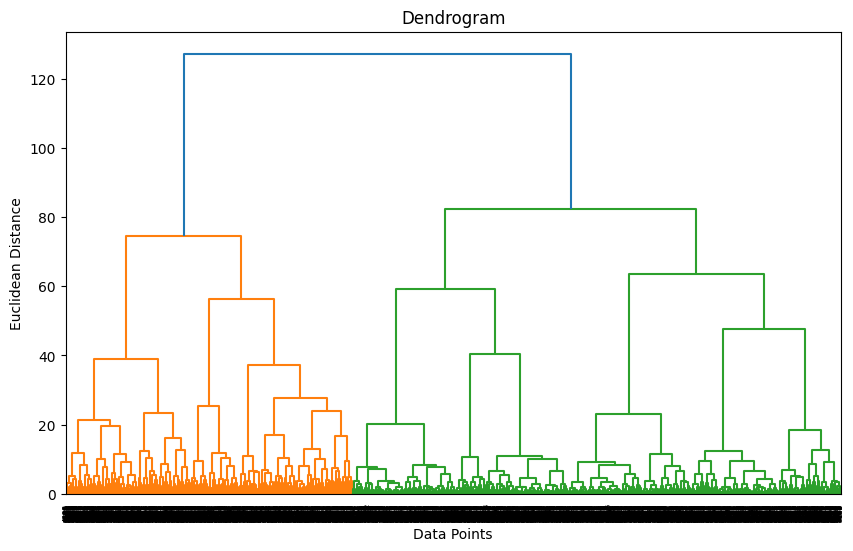

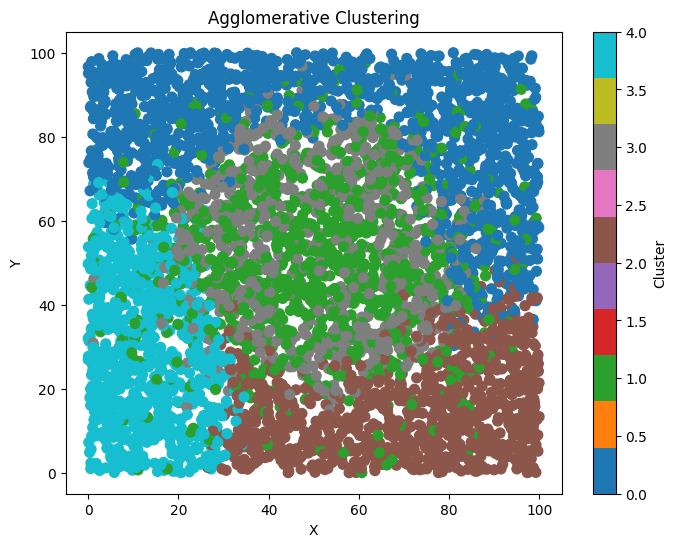

In [4]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# Clustering
agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_scaled)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(df['x'], df['y'], c=agg_labels, cmap='tab10', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()


## DBSCAN Clustering


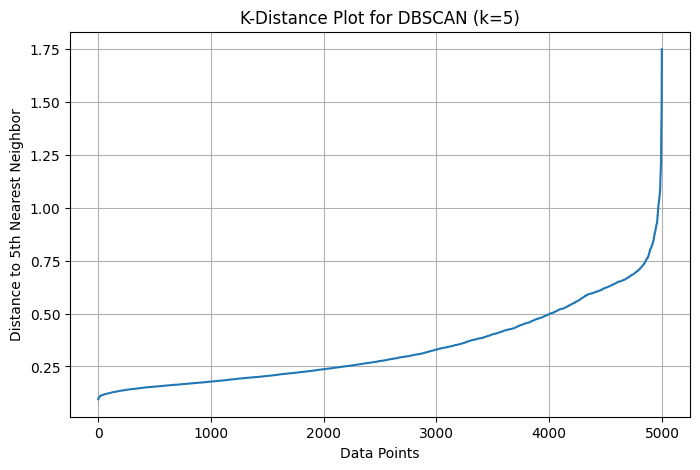

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:,4], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN (k=5)')
plt.xlabel('Data Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.grid(True)
plt.show()


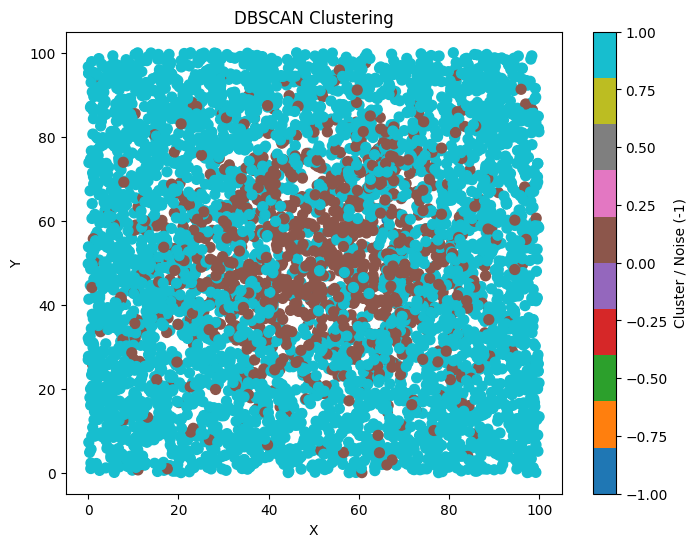

In [6]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df['x'], df['y'], c=dbscan_labels, cmap='tab10', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster / Noise (-1)')
plt.show()


## ✅ Kesimpulan

Berdasarkan hasil analisis klastering terhadap data lokasi gerai kopi dan zona sepi menggunakan tiga pendekatan yang berbeda — **KMeans**, **Hierarchical Clustering (HCA)**, dan **DBSCAN** — dapat disimpulkan sebagai berikut:

- 🔹 **KMeans Clustering** merupakan metode yang cepat dan efisien untuk membentuk klaster apabila jumlah klaster sudah diketahui sebelumnya. Metode ini bekerja optimal pada data yang memiliki distribusi simetris (berbentuk bulat) dan terpisah secara jelas. Namun, metode ini memiliki kelemahan ketika digunakan pada data dengan outlier atau bentuk klaster yang tidak beraturan.

- 🔹 **Hierarchical Clustering (Agglomerative)** menawarkan pendekatan bottom-up yang membentuk struktur klaster secara bertingkat. Hasilnya divisualisasikan dalam bentuk **dendrogram**, yang sangat membantu dalam eksplorasi awal untuk memahami pola relasi antar data. HCA juga tidak membutuhkan jumlah klaster di awal, namun memiliki keterbatasan dalam skala dan efisiensi komputasi.

- 🔹 **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** terbukti sebagai metode yang sangat fleksibel dalam mengelompokkan data berdasarkan kepadatan titik. Keunggulannya terletak pada kemampuannya untuk mendeteksi **outlier** atau zona sepi, serta membentuk klaster dengan **bentuk yang tidak beraturan**, tanpa perlu menentukan jumlah klaster sejak awal.

---

### 🌟 **Rekomendasi**
Dalam konteks analisis lokasi gerai kopi dan identifikasi zona sepi, **DBSCAN** adalah metode yang paling sesuai karena mampu:
- Membedakan area padat dan area sepi secara alami
- Mengidentifikasi noise yang bisa ditafsirkan sebagai lokasi yang tidak layak untuk membuka gerai
- Menangani bentuk distribusi geografis yang kompleks

Dengan demikian, **DBSCAN direkomendasikan sebagai pendekatan utama** untuk pengambilan keputusan terkait ekspansi gerai berdasarkan pola lokasi.
